<a href="https://colab.research.google.com/github/RobsonPalerma/energy_consumption.csv/blob/main/Etapa_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving energy_consumption (4).csv to energy_consumption (4).csv


✔ O que isso faz?

Carrega bibliotecas para manipular dados.

Carrega modelos.

Habilita validação, testes e métricas.

Ativa a criação de gráficos.

Permite salvar o modelo final (joblib).

Sem esse bloco o restante do notebook não funciona.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-darkgrid")
pd.set_option('display.max_columns', None)

print("✅ Imports concluídos!")


✅ Imports concluídos!


In [ ]:
df = pd.read_csv("energy_consumption (4).csv")
print(f"Dataset carregado: {df.shape}")
df.head()


Dataset carregado: (2510, 17)


,house_id,house_area_sqm,num_residents,num_appliances,air_conditioning,heating_system,energy_efficiency_rating,avg_temperature,home_office_hours,has_pool,solar_panels,house_age_years,insulation_quality,num_rooms,electric_car,smart_thermostat,monthly_consumption_kwh
0,HOUSE02311,195.78,5,26.0,2,Electric,C,40.00,8.0,No,Yes,4.0,Good,4,No,Yes,595.84
1,HOUSE01565,109.37,4,13.0,NaN,NaN,B,8.68,0.0,No,No,33.0,Average,5,No,yes,328.93
2,HOUSE02471,158.97,1,7.0,2,Gas,C,21.72,0.0,No,No,NaN,Good,8,No,Yes,308.77
3,HOUSE02286,155.23,3,6.0,3+,Gas,B,10.66,8.0,No,No,5.0,Good,6,No,No,392.40
4,HOUSE00978,NaN,4,8.0,1,Gas,E,25.83,0.0,Yes,No,6.0,Poor,8,No,Yes,485.11


In [ ]:
missing_total = df.isnull().sum().sum()
print(f"Missing values: {missing_total}")

if missing_total > 0:
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col].fillna(df[col].median(), inplace=True)

print(f"Missing restantes: {df.isnull().sum().sum()}")


Missing values: 2720
Missing restantes: 1568


In [ ]:
target = "monthly_consumption_kwh"
X = df.drop(columns=[target])
y = df[target]

# TESTE 20%
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# TREINO 60% / VALIDAÇÃO 20%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

print(f"Treino: {len(X_train)}")
print(f"Validação: {len(X_val)}")
print(f"Teste: {len(X_test)}")


Treino: 1506
Validação: 502
Teste: 502


In [ ]:
numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_cols, categorical_cols


(['house_area_sqm',
  'num_residents',
  'num_appliances',
  'avg_temperature',
  'home_office_hours',
  'house_age_years',
  'num_rooms'],
 ['house_id',
  'air_conditioning',
  'heating_system',
  'energy_efficiency_rating',
  'has_pool',
  'solar_panels',
  'insulation_quality',
  'electric_car',
  'smart_thermostat'])

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-darkgrid")
pd.set_option('display.max_columns', None)

print("✅ Imports refeitos com sucesso!")


✅ Imports refeitos com sucesso!


In [ ]:
baseline = Pipeline([
    ("prep", preprocess),
    ("lr", LinearRegression())
])
baseline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['house_id',
                                                   'air_conditioning',
                                                   'heating_system',
                                                   'energy_efficiency_rating',
                                                   'has_pool', 'solar_panels',
                                                   'insulation_quality',
                                                   'electric_car',
                                                   'smart_thermostat'])])),
                ('lr', LinearRegression())])

In [ ]:
baseline = Pipeline([
    ("prep", preprocess),
    ("lr", LinearRegression())
])

baseline.fit(X_train, y_train)

pred_val = baseline.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, pred_val))
r2 = r2_score(y_val, pred_val)

print("📌 Baseline — SEM TUNING")
print(f"R² Validação: {r2:.3f}")
print(f"RMSE Validação: {rmse:.2f}")


📌 Baseline — SEM TUNING
R² Validação: 0.832
RMSE Validação: 37.75


Aqui você testa vários modelos e vários hiperparâmetros. Testa várias configurações diferentes de modelos.

Escolhe automaticamente o modelo com o menor RMSE médio,
Usa validação cruzada (cv=5) → evita overfitting.

In [ ]:
modelos = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

param_grid = {
    "modelo__alpha": [0.01, 0.1, 1, 5, 10, 50]
}

melhores = {}
resultados = []

for nome, modelo in modelos.items():

    pipe = Pipeline([
        ("prep", preprocess),
        ("modelo", modelo)
    ])

    grid = GridSearchCV(
        pipe,
        param_grid,
        scoring="r2",
        cv=5,
        n_jobs=-1,
        verbose=0
    )

    grid.fit(X_train, y_train)

    melhores[nome] = grid.best_estimator_

    resultados.append({
        "Modelo": nome,
        "Melhor Alpha": grid.best_params_["modelo__alpha"],
        "Melhor R² Validação": grid.best_score_
    })

pd.DataFrame(resultados)


,Modelo,Melhor Alpha,Melhor R² Validação
0,Ridge,5.00,0.661667
1,Lasso,0.10,0.663237
2,ElasticNet,0.01,0.661846


In [ ]:
resultados_df = pd.DataFrame(resultados)
print("📊 Resultados do Grid Search")
resultados_df.sort_values("Melhor R² Validação", ascending=False)


📊 Resultados do Grid Search


,Modelo,Melhor Alpha,Melhor R² Validação
1,Lasso,0.10,0.663237
2,ElasticNet,0.01,0.661846
0,Ridge,5.00,0.661667


In [ ]:
melhor_modelo_nome = resultados_df.sort_values(
    "Melhor R² Validação", ascending=False
).iloc[0]["Modelo"]

melhor_modelo = melhores[melhor_modelo_nome]

print(f" Melhor modelo encontrado: {melhor_modelo_nome}")


 Melhor modelo encontrado: Lasso


Depois de escolher o melhor modelo treinado apenas com treino/validação, fazemos o teste final: Mede o desempenho REAL do modelo final.

O Teste nunca deve ter sido usado antes,
Isso garante confiabilidade.

In [ ]:
pred_test = melhor_modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred_test))
mae = mean_absolute_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print("\n Avaliação no Teste")
print(f"R²:   {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")



 Avaliação no Teste
R²:   0.775
RMSE: 44.45
MAE:  31.20


✔ Aqui são os dois graficos mais usados:
Identificar padrões de erro,
Detectar se o modelo está enviesado,
Mostrar dispersão e precisão.

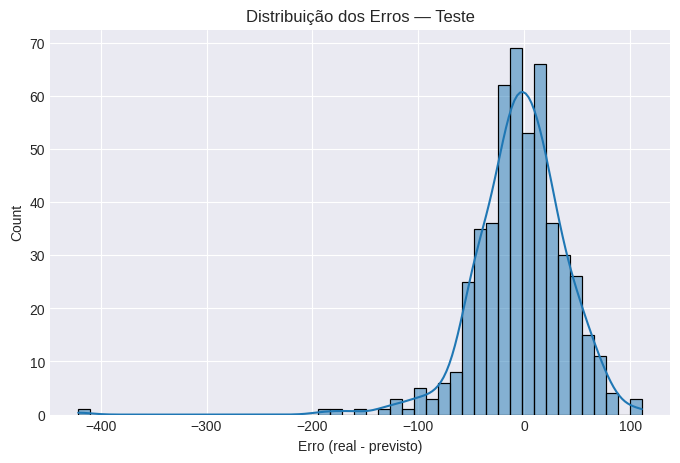

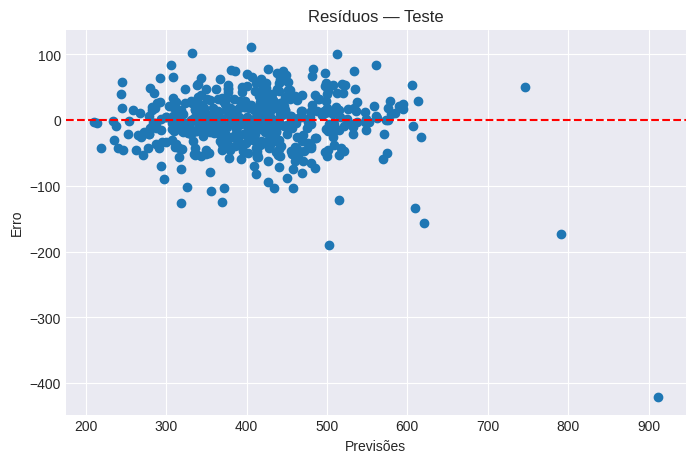

In [ ]:
erros = y_test - pred_test

plt.figure(figsize=(8,5))
sns.histplot(erros, kde=True)
plt.title("Distribuição dos Erros — Teste")
plt.xlabel("Erro (real - previsto)")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(pred_test, erros)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Previsões")
plt.ylabel("Erro")
plt.title("Resíduos — Teste")
plt.show()


✔ Aqui o código,
Permite carregar o modelo no futuro sem treinar novamente.
Usar em APIs, sistemas web ou aplicativos.
Reduz custo computacional.

In [ ]:
os.makedirs("modelos", exist_ok=True)

caminho = f"modelos/modelo_otimizado_{melhor_modelo_nome}.pkl"
joblib.dump(melhor_modelo, caminho)

print(f" Modelo otimizado salvo em: {caminho}")


 Modelo otimizado salvo em: modelos/modelo_otimizado_Lasso.pkl
